https://www.davidsilver.uk/wp-content/uploads/2020/03/pg.pdf

https://github.com/CLAIR-LAB-TECHNION/FSTMA-course/blob/main/tutorials/tut04/Policy_Gradient.ipynb

https://github.com/CLAIR-LAB-TECHNION/FSTMA-course/blob/main/tutorials/tut06/Actor%20Critic.ipynb

https://medium.com/@thechrisyoon/deriving-policy-gradients-and-implementing-reinforce-f887949bd63

https://gymnasium.farama.org/environments/classic_control/pendulum/

# Policy Gradient

## The Environment For This Tuturial
*Todo: introduce the environment with some code*

In [1]:
import gymnasium as gym
%matplotlib inline

# for simplicity and time saving, we will make our environment easier by reducing gravity
gravity = 2.0
env = gym.make("Pendulum-v1", render_mode="rgb_array", g=gravity)

Ran for 200 time steps and accumulated -711.773203812082 reward



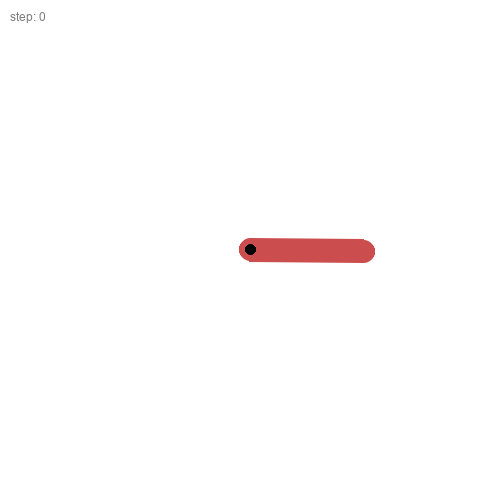

In [2]:
from utils import plot_video

# run one episode with random actions:
terminated, truncated = False, False
total_reward = 0.0
time_steps = 0
images = []
observation, info = env.reset()
while not terminated and not truncated:
    images.append(env.render())
    action = env.observation_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    time_steps += 1

print(f"Ran for {time_steps} time steps and accumulated {total_reward} reward")
plot_video(images)

## Policy Based Methods
We have seen that Q learning is not scalable to high dimensional state space, thus we use function approximation methods (such as neural networks) to estimate our Q function. But we still have to output the value of each action, what if we have continuous or too many possible actions? we will meet the course of dimensionality.

In this tutorial we are going to present a different approach: **Policy Based Methods** and specifically **Policy Gradient Methods**.
Instead of learning the Q function, we will learn a **parameterized policy** $\pi_{\theta}(s) = \pi(s;\theta)$ where $\theta$ is a set of parameters and $\pi$ is a distribution function over all possible actions.

*TODO: add sketch of value based and policy based methods*


TODO: Other motivations such as stochastic policy
optional: explain why stochastic policy is better.*

## Parameterized Policy
A parametrized policy can be any function with parameters, that has an input of a state, and outputs a distribution function over actions, and it has learnable parameters. One representation of a parametric function is a neural network. If you don't know neural network don't worry about it. All you have to know is that it is a function approximator with learnable parameters we will call $\theta$.

*TODO: add the code that loads a policy and show what it can do (with explanation)*

## Improving the policy
Now that we have a parameterized policy, we need to find the best parameters $\theta$ that will lead this policy to accumulate as high a reward as possible. How do we do that? possibly with gradient descent.

We would like to maximize the return. We will denote the return here with $J$. Note that it depends on the policy, thus it depends on its parameters $\theta$.

![](assets/return.png)

If we could compute the gradient of $J$ with respect to the parameters of the policy $\theta$, we would be able to take a small step in the parameter space in the direction of the gradient, thus increasing the return and improving the policy.

## Policy Gradient Theorem
It Turns out (and it's not that obvious) that the gradient of the return with respect to the policy parameter can be computed.
The proof is not trivial, but the result is

![](assets/pg_theorem.png)

*TODO : explain it, including why there is an expectation*

*TODO: add code example of extracting the grad*

*TODO: add proof*

## REINFORCE
![](assets/reinforce_paper.png)
Policy gradient is just a Theorem or a concept. REINFORCE, is an algorithm that uses the policy gradient theorem, along with monte carlo in order to train a parametrized policy.

Recall that we don't know the distribution of $Q^{\pi_{\theta}}(s,a)$, thus we can't compute this expectation.
In REINFORCE we approximate the expectation over the Q value of pi, with samples of returns from the environment.

*TODO: Write a more correct version in power point and add it here*
![](assets/REINFORCE.png)





## REINFORCE Implementation
add most of the algorithm, and todo to complete it

## Solving Pendulum Environment With Reinforce
Run Reinforce and plot results

## Drawback of REINFORCE
Note the oscillation in the convergence of reinforce, this happens due to the high variance in the monte carlo.
One approach to solve this, and get a better algorithm is replacing the monte carlo approximation of the return, with a value function approximate like in Q learning.
Such methods are called **Actor-Critic** methods.

*TODO: add celll that loads DDPG and trains it on pendulum, then compares it to REINFORCE with TODOS*